## <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>


Dalam proyek ini, akan dilakukan unsupervised clustering pada data catatan pelanggan dari basis data perusahaan grosir. Segmentasi pelanggan adalah praktik memisahkan pelanggan ke dalam kelompok yang mencerminkan kemiripan di antara pelanggan dalam setiap kelompok. Disini akan dibagi pelanggan ke dalam segmen untuk mengoptimalkan signifikansi setiap pelanggan terhadap bisnis. Hal ini dilakukan untuk memodifikasi produk sesuai dengan kebutuhan dan perilaku yang berbeda dari pelanggan. Ini juga membantu bisnis untuk memenuhi kebutuhan dari berbagai jenis pelanggan.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Konten Tabel</p>

* [1. Libraries Import](#1)

* [2. Load Dataset](#2)

* [3. Data Cleaning](#3)

* [4. Data Preprocessing](#4)

* [5. Dimensionality Reduction](#5)

* [6. Clustering](#6)

* [7. Evaluating Models](#7)

* [8. Profiling](#8)

* [9. Conclusion](#9)

* [10. End](#10)

<a id="1"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Libraries Import</p>

In [29]:
# importing libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Load Dataset</p>

In [30]:
# load dataset

data = pd.read_csv(
    "dataset/marketing_campaign.csv",
    sep="\t"
)
print(f"Jumlah record data: {len(data)}")
data.head() # tampilkan 5 baris teratas

Jumlah record data: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Informasi detail dataset [disini](https://www.kaggle.com/imakash3011/customer-personality-analysis).

<a id="3"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Data Cleaning</p>


**Di bagian ini**
* Data Cleaning
* Feature Engineering

Untuk memahami langkah-langkah yang akan dilakukan selanjutnya. Berikut informasi yang ada dalam dataset.

In [31]:
# informasi dalam fitur 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Dari output di atas, dapat disimpulkan dan dicatat bahwa:**

* Terdapat missing value dalam kolom income
* Kolom Dt_Customer menunjukkan tanggal pelanggan bergabung dengan database tidak diuraikan ke dalam DateTime
* Terdapat beberapa fitur kategoris dalam DataFrame; karena ada beberapa fitur dengan tipe data: object. Jadi perlu dilakukan encode (pengkodean) ke dalam bentuk numerik nantinya.

Pertama-tama, untuk missing value, cukup menghapus baris dari data yang memiliki nilai missing value.

In [32]:
# hapus data dengan NA values
data = data.dropna()
print("Total data-point setelah menghapus baris dengan missing value adalah:", len(data))

Total data-point setelah menghapus baris dengan missing value adalah: 2216


Langkah selanjutnya, buat fitur dari **"Dt_Customer"** yang menunjukkan jumlah hari seorang pelanggan terdaftar dalam database perusahaan. Namun, untuk menjaga kesederhanaan, disini akan mengambil nilai secara relatif terhadap pelanggan yang paling baru dalam record data.

Oleh karena itu, untuk mendapatkan nilai-nilai tersebut, harus memeriksa tanggal-tanggal terbaru dan terlama yang tercatat.

In [33]:
# ambil data

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# tanggal terbaru dan terlama yang tercatat
print("Tanggal langganan pelanggan terbaru dalam catatan:", max(dates))
print("Tanggal langganan pelanggan terlama dalam catatan:", min(dates))

Tanggal langganan pelanggan terbaru dalam catatan: 2014-06-29
Tanggal langganan pelanggan terlama dalam catatan: 2012-07-30


Membuat fitur **("Customer_For")** yang menunjukkan jumlah hari sejak pelanggan mulai berbelanja di toko terhadap tanggal terakhir yang tercatat.

In [34]:
# buat fitur "Customer_For"

days = []
# ambil nilai sebagai pelanggan terbaru
d1 = max(dates)

for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors= "coerce")

Sekarang, coba jelajahi nilai unik dalam fitur kategoris untuk mendapatkan gambaran yang jelas tentang data.

In [35]:
print("Total kategoris di fitur Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total kategoris di fitur Education:\n", data["Education"].value_counts())

Total kategoris di fitur Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total kategoris di fitur Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**Pada bagian berikutnya, lakukan langkah-langkah untuk membuat beberapa fitur baru:**

* Mengekstrak **"Umur (Age)"** seorang pelanggan berdasarkan **"Year_Birth"** yang menunjukkan tahun kelahiran dari orang yang bersangkutan.
* Buat fitur lain **"Spent"** yang menunjukkan total jumlah yang dibelanjakan oleh pelanggan dalam berbagai kategori selama dua tahun.
* Buat fitur lain **"Living_With"** dari **"Marital_Status"** untuk mengekstrak kondisi tinggal suatu pasangan.
* Buat fitur **"Children"** untuk menunjukkan total anak dalam sebuah rumah tangga, yaitu, anak-anak dan remaja.
* Untuk mendapatkan gambaran lebih lanjut tentang rumah tangga, buat fitur yang menunjukkan **"Family_Size"**.
* Buat fitur **"Is_Parent"** untuk menunjukkan status sebagai orang tua.
* Terakhir, buat tiga kategori dalam **"Education"** dengan menyederhanakan jumlah nilai-nilainya.
* Hapus beberapa fitur yang redundan.

In [36]:
# feature engineering

# umur pelanggan (today)
data["Age"] = 2024-data["Year_Birth"]

# total spending ke beberapa kategori item
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# hasilkan kondisi tinggal dengan status pernikahannya "Alone"
data["Living_With"] = data["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone",})

# fitur yang mengindikasikan total anak yang tinggal dalam rumah yang sama
data["Children"] = data["Kidhome"] + data["Teenhome"]

# fitur untuk total keluarga yang tinggal dalam satu rumah
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# fitur yang menunjukkan status orang tua
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

# segmentasi untuk level pendidikan menjadi 3 grup
data["Education"] = data["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

# tata ulang nama kolom
data = data.rename(
    columns= {
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold"
    }
)

# hapus beberapa fitur redundan
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Sekarang setelah terdapat beberapa fitur baru, lihat nilai statistik datanya.

In [37]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


Statistik di atas menunjukkan beberapa perbedaan dalam rata-rata Income dan Age serta Income maksimum dan Age.

Perlu diperhatikan bahwa usia maksimum adalah 128 tahun, karena dari perhitungan usia yang akan menjadi hari ini (yaitu 2024) dan data tersebut sudah lama.

Perlu untuk melihat pandangan yang lebih luas tentang data tersebut.
Buat plot beberapa fitur yang dipilih.

Grafik Relatif Beberapa Fitur yang Dipilih: Subdata Subset


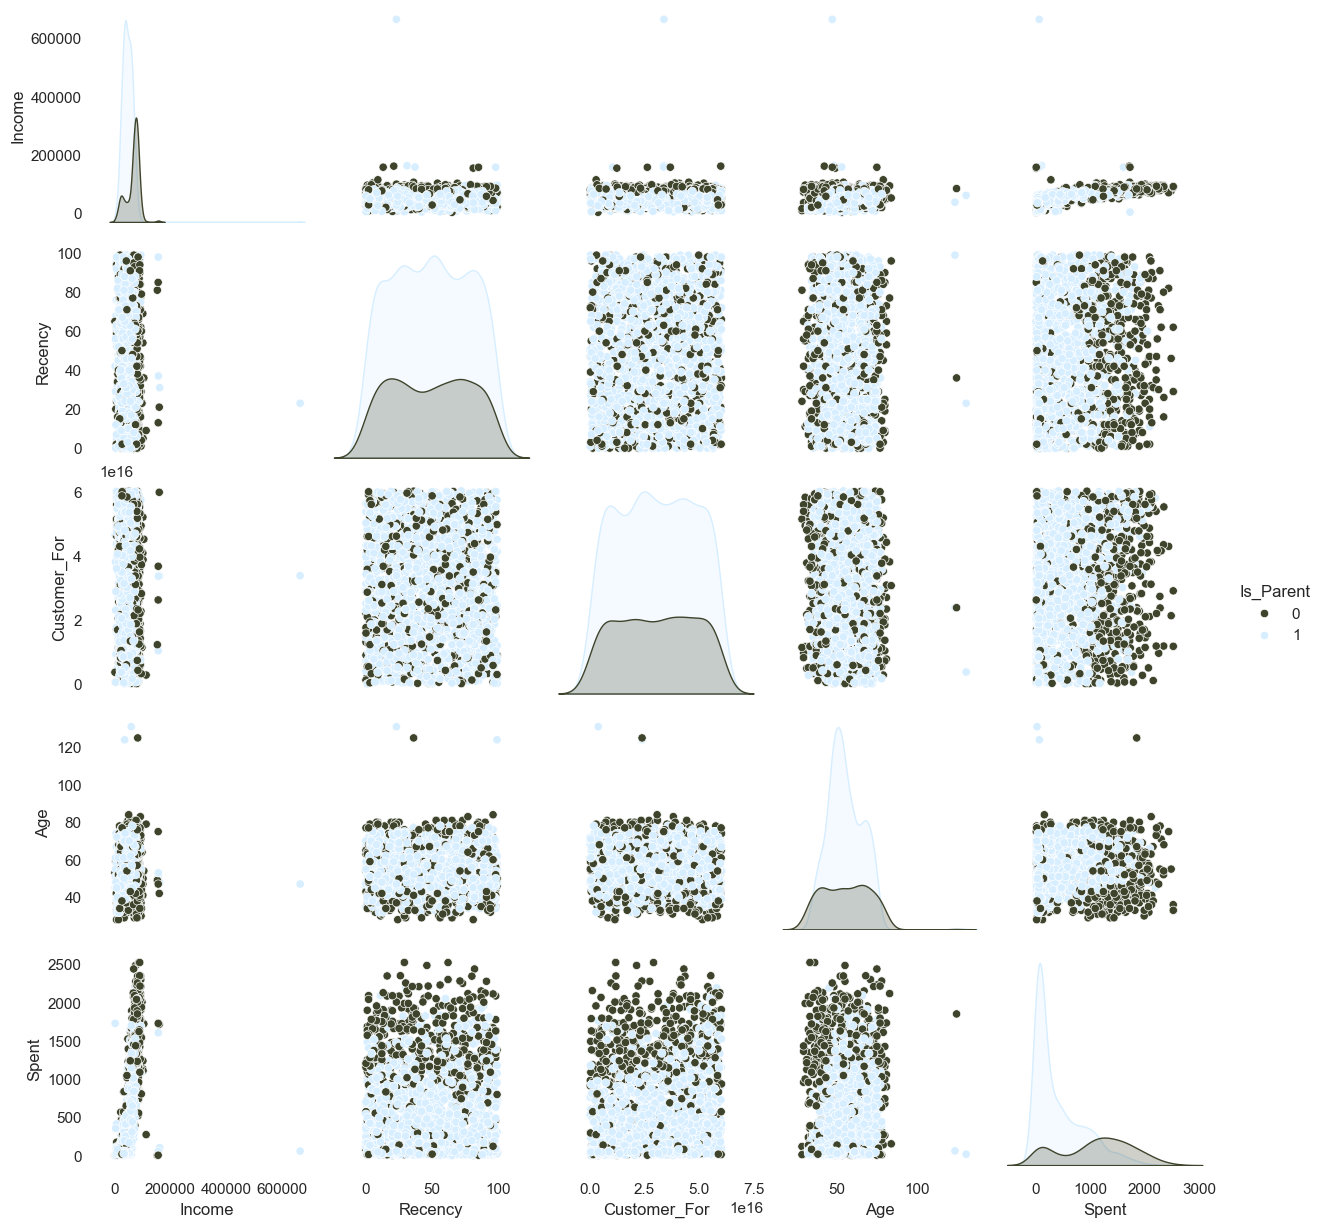

In [38]:
# untuk mem-plot beberapa fitur yang dipilih

# setting preferensi warna
sns.set(rc= {"axes.facecolor": "#FFFFFF", "figure.facecolor": "#FFFFFF"})
pallet = ["#3E442B", "#6A7062", "#8D909B", "#AAADC4", "#D6EEFF", "#AEC3D3"]
cmap = colors.ListedColormap(["#3E442B", "#6A7062", "#8D909B", "#AAADC4", "#D6EEFF", "#AEC3D3"])

# plotting mengikuti fitur
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Grafik Relatif Beberapa Fitur yang Dipilih: Subdata Subset")

plt.Figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent", palette= (["#3E442B","#D6EEFF"]))

# hue
plt.show()

Terlihat jelas, ada beberapa outlier dalam fitur Income dan Age.
Sekarang coba hapus outlier dalam data.

In [39]:
# hapus outlier dengan menetapkan batasan pada Age dan Income.

data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print("Total dari data-points setelah menghapus outlier adalah:", len(data))

Total dari data-points setelah menghapus outlier adalah: 2212


Selanjutnya, lihat korelasi di antara fitur-fitur tersebut.
(Mengecualikan atribut kategoris pada titik ini)

<Axes: >

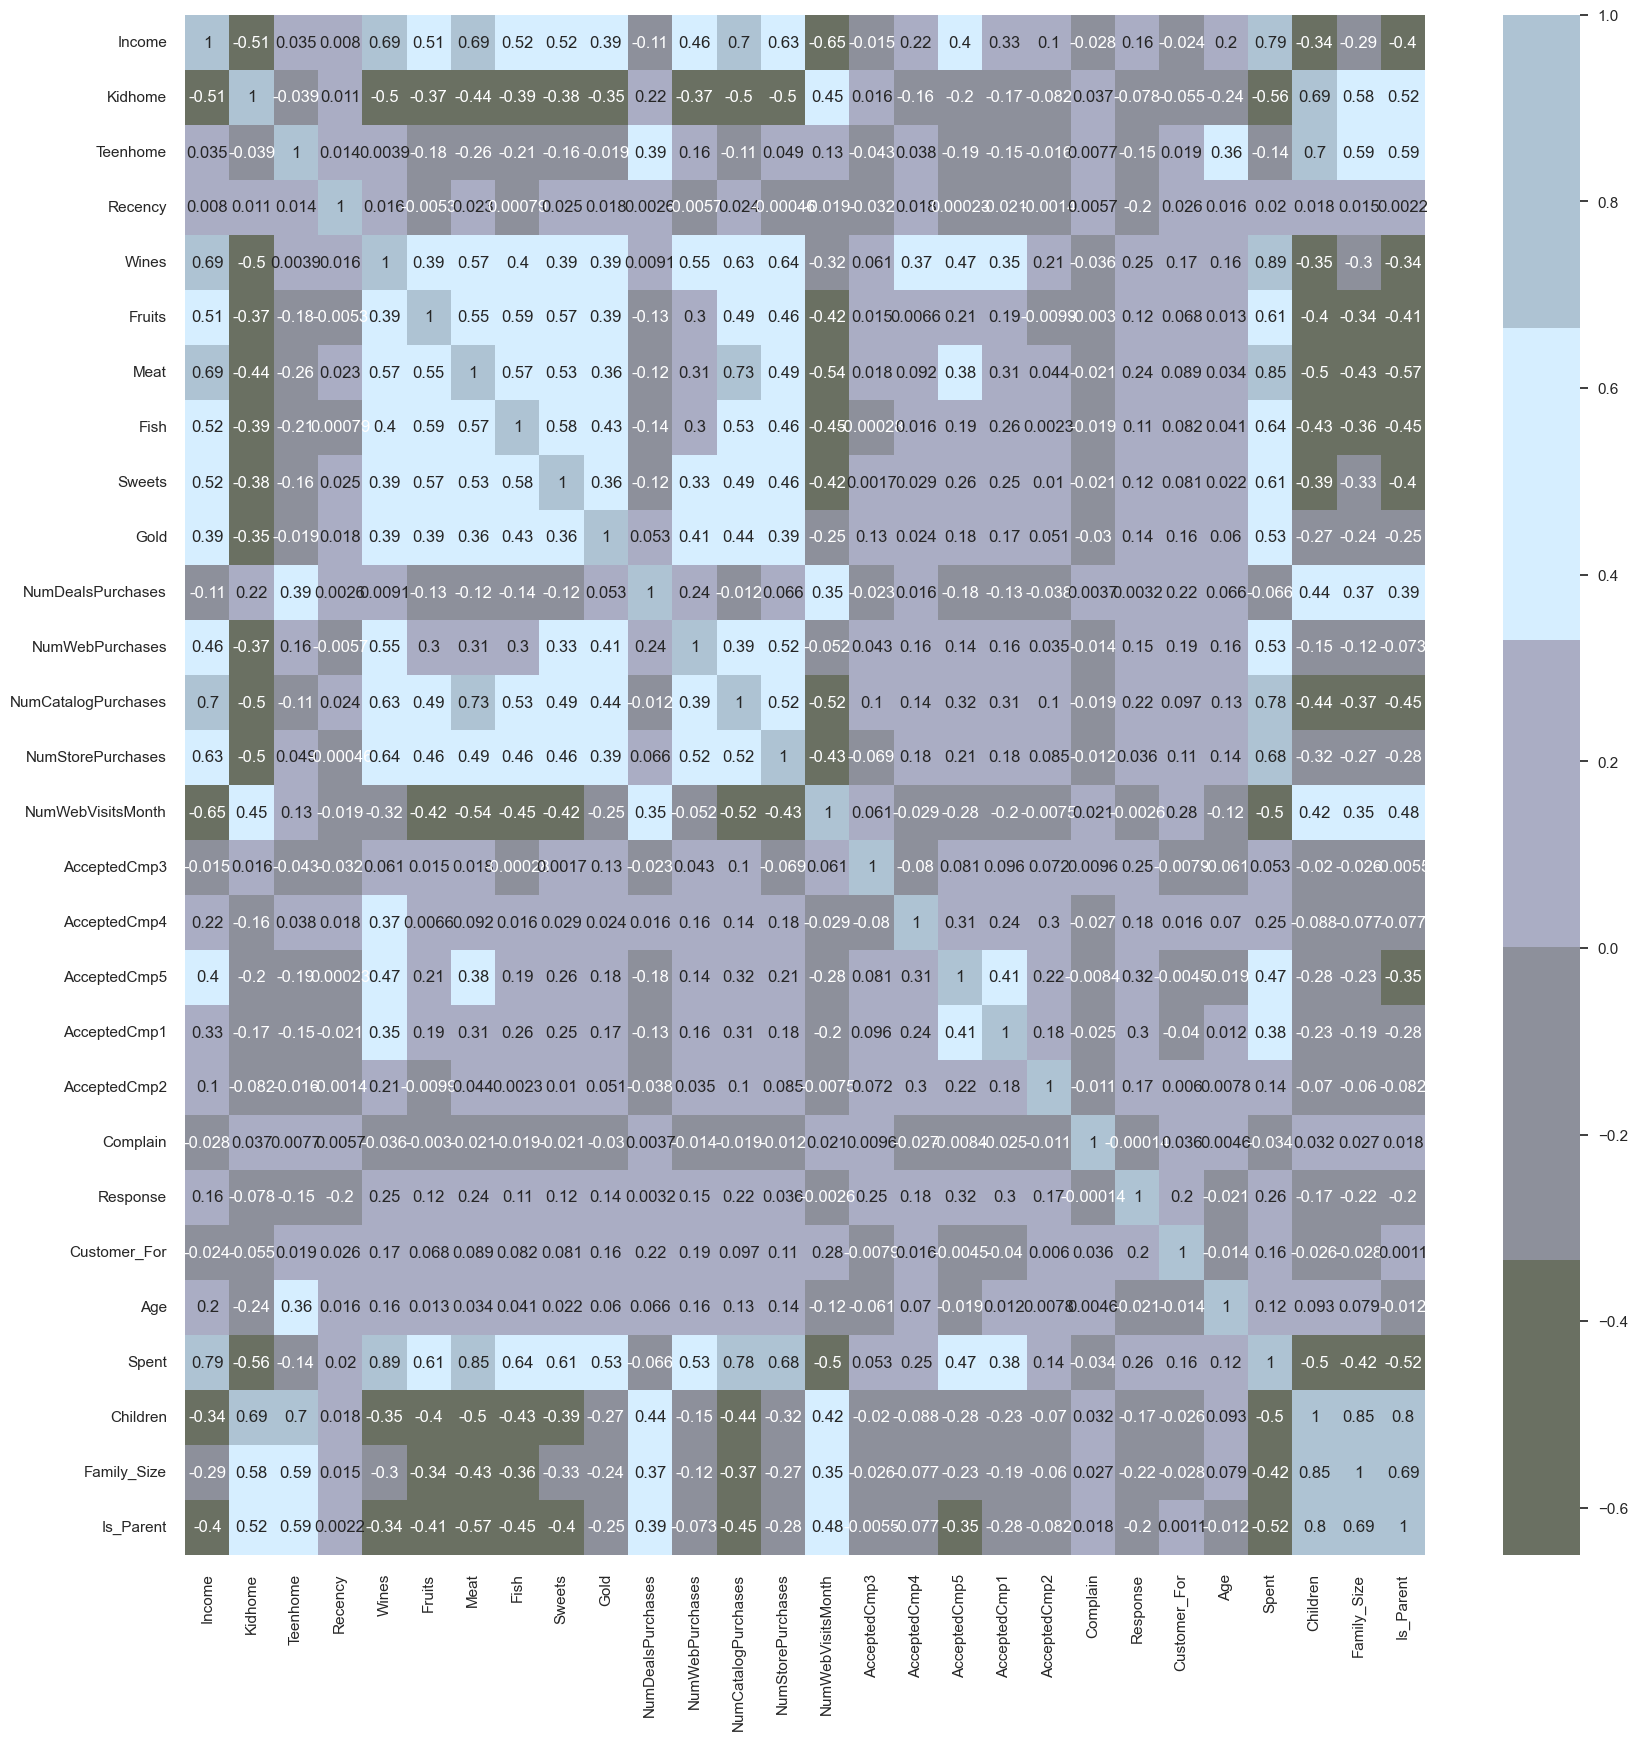

In [40]:
# correlation matrix

num_data = data.drop(columns= ["Education", "Living_With"])
corrmat = num_data.corr()
plt.figure(figsize= (20, 20))  
sns.heatmap(corrmat, annot= True, cmap= cmap, center= 0)

Terlihat jika data telah cukup bersih dan fitur-fitur baru telah disertakan. Sekarang coba lanjutkan ke step selanjutnya, yaitu preprocessing data.

<a id="4"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

Di bagian ini, lakukan preprocessing pada data untuk proses menuju clustering.

**Langkah-langkah berikut diterapkan untuk memproses data:**

* Label encoding pada fitur kategoris
* Penskalaan fitur menggunakan standard scaler
* Buat atribut DataFrame untuk dimensionality reduction

In [41]:
# dapatkan list dari variabel kategoris
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel kategoris dalam Dataset:", object_cols)

Variabel kategoris dalam Dataset: ['Education', 'Living_With']


In [42]:
# label encoding untuk object dtypes
encoder = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(encoder.fit_transform)

print("Semua fitur telah menjadi numerik")

Semua fitur telah menjadi numerik


In [43]:
# buat duplikat dari data
temp = data.copy()
# buat subset dari DataFrame dengan menghapus fitur-fitur yang berkaitan dengan penawaran yang diterima dan promosi
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
temp = temp.drop(cols_del, axis=1)

# scaling
scaler = StandardScaler()
scaler.fit(temp)
scaled_temp = pd.DataFrame(scaler.transform(temp), columns= temp.columns)
print("Semua fitur sekarang telah diskalakan")

Semua fitur sekarang telah diskalakan


In [44]:
# data yang discaling akan digunakan untuk mereduksi dimensionalitas
print("DataFrame yang digunakan untuk membuat model:")
scaled_temp.head()

DataFrame yang digunakan untuk membuat model:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<a id="5"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

Dalam masalah ini, ada banyak faktor berdasarkan klasifikasi akhir yang akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur-fitur ini berkorelasi, dan oleh karena itu redundan. Itulah sebabnya akan dilakukan dimensionality reduction pada fitur-fitur yang dipilih sebelum melewatinya ke pengklasifikasi.
*Dimensionality reduction adalah proses pengurangan jumlah variabel acak yang dipertimbangkan, dengan mendapatkan seperangkat variabel utama.*

**Principal Componen Analysis (PCA)** adalah teknik untuk mengurangi dimensionalitas dataset seperti yang digunakan pada notebook ini, meningkatkan interpretabilitas tetapi pada saat yang sama meminimalkan kehilangan informasi (information loss).

**Langkah-langkah dalam bagian ini:**
* Dimensionality reduction dengan PCA
* plotting DataFrame yang direduksi

**Dimensionality reduction dengan PCA**

Untuk proyek ini, diterapkan pengurangan dimensi menjadi 3.

In [45]:
# inisialisasi PCA untuk reduksi dimensi menjadi 3 fitur
pca = PCA(n_components= 3)
pca.fit(scaled_temp)

PCA_temp = pd.DataFrame(pca.transform(scaled_temp), columns=(["col1", "col2", "col3"]))
PCA_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.212219e-17,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,2.569775e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,5.219855e-17,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


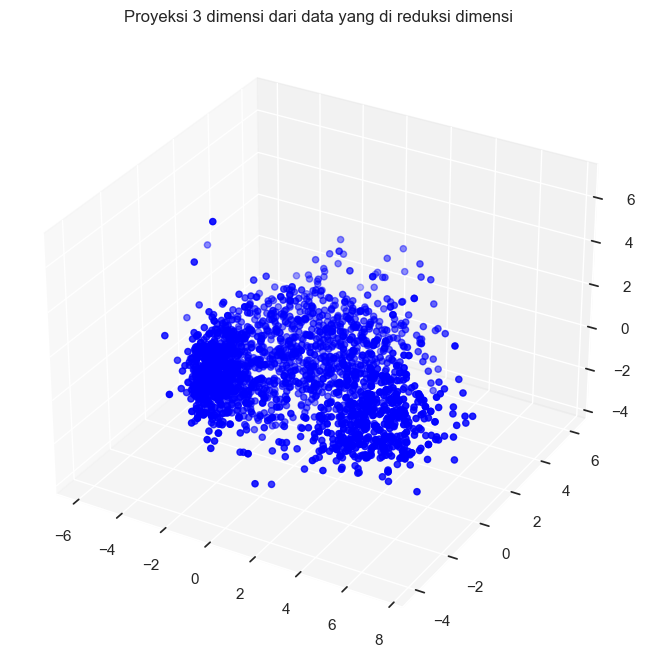

In [46]:
# proyeksi 3 dimensi dari data yang di reduksi dimensi
x = PCA_temp["col1"]
y = PCA_temp["col2"]
z = PCA_temp["col3"]

# plot
fig = plt.figure(figsize= (10, 8))
ax = fig.add_subplot(111, projection= "3d")
ax.scatter(x, y, z, c= "blue", marker= "o")
ax.set_title("Proyeksi 3 dimensi dari data yang di reduksi dimensi")
plt.show()

<a id="6"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

Sekarang setelah dikurangi atributnya menjadi 3 dimensi, coba lakukan clustering melalui Agglomerative clustering. Agglomerative clustering adalah metode pengelompokan hierarkis. Ini melibatkan penggabungan contoh hingga jumlah klaster yang diinginkan tercapai.

**Langkah-langkah yang terlibat dalam Clustering**
* Metode Siku (Elbow Method) untuk menentukan jumlah klaster yang akan dibentuk
* Pengelompokan melalui Agglomerative Clustering
* Memeriksa klaster yang terbentuk melalui scatter plot

Elbow Method untuk menentukan jumlah klaster yang akan dibentuk:


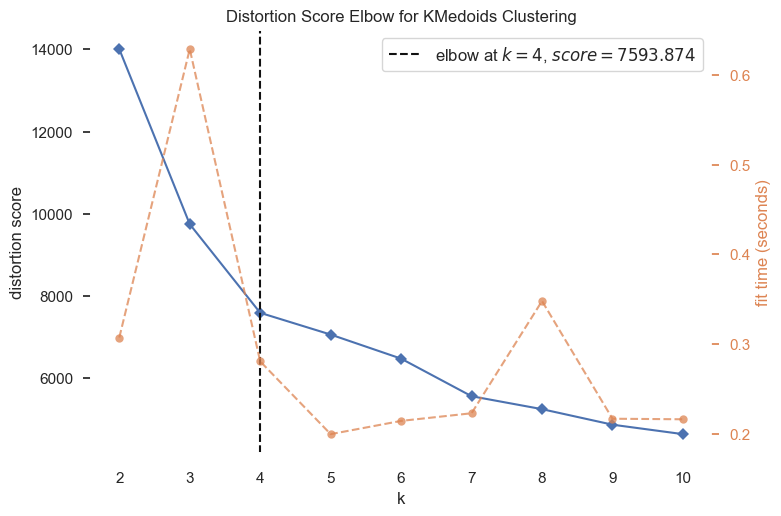

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# pemeriksaan Elbow Method untuk menemukan jumlah klaster yang akan dibentuk

print("Elbow Method untuk menentukan jumlah klaster yang akan dibentuk:")
Elbow_M = KElbowVisualizer(KMedoids(), k= 10)
Elbow_M.fit(PCA_temp)
Elbow_M.show()

Hasil di atas menunjukkan bahwa 4 cluster akan menjadi jumlah cluster yang optimal untuk data ini.
Selanjutnya, sesuaikan Model Agglomerative Clustering untuk mendapatkan cluster akhir.

In [48]:
# inisialisasi model Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters= 4)

# fit model dan predict cluster
yhat_AC = AC.fit_predict(PCA_temp)
PCA_temp["Clusters"] = yhat_AC

# tambahkan fitur Clusters ke original DataFrame
data["Clusters"] = yhat_AC

Untuk memeriksa cluster yang terbentuk, lihat distribusi 3-D dari cluster tersebut.

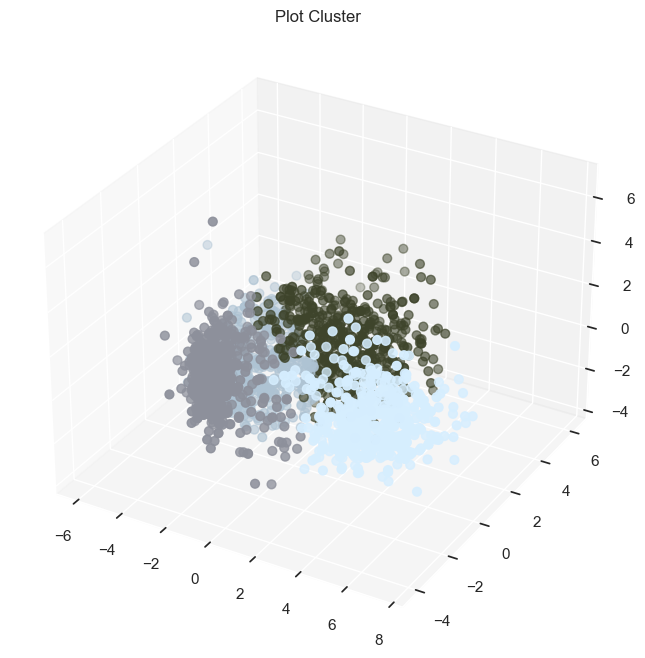

In [49]:
# plot clusters
fig = plt.figure(figsize= (10, 8))
ax = plt.subplot(111, projection= "3d", label= "bla")
ax.scatter(x, y, z, s= 40, c= PCA_temp["Clusters"], marker= 'o', cmap= cmap )
ax.set_title("Plot Cluster")
plt.show()

<a id="7"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Evaluating Models</p>

Karena model ini adalah unsupervised clustering. Tidak ada fitur yang tersedia untuk mengevaluasi atau menilai model ini. Tujuan dari bagian ini adalah untuk mempelajari pola-pola dalam cluster yang terbentuk dan menentukan sifat pola-pola klaster tersebut.

Untuk itu, mari lihat data dalam konteks cluster melalui analisis exploratory data dan menarik kesimpulan.

**Pertama-tama, mari lihat distribusi kelompok dari clustering**

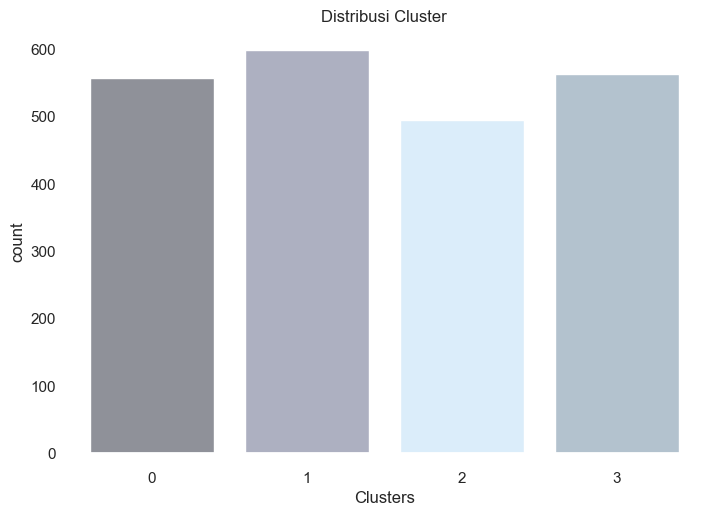

In [50]:
# plot countplot dari cluster

pal = ["#8D909B", "#AAADC4", "#D6EEFF", "#AEC3D3"]
pl = sns.countplot(x= data["Clusters"], palette= pal)
pl.set_title("Distribusi Cluster")
plt.show()

Cluster-cluter-nya tampak cukup terdistribusi

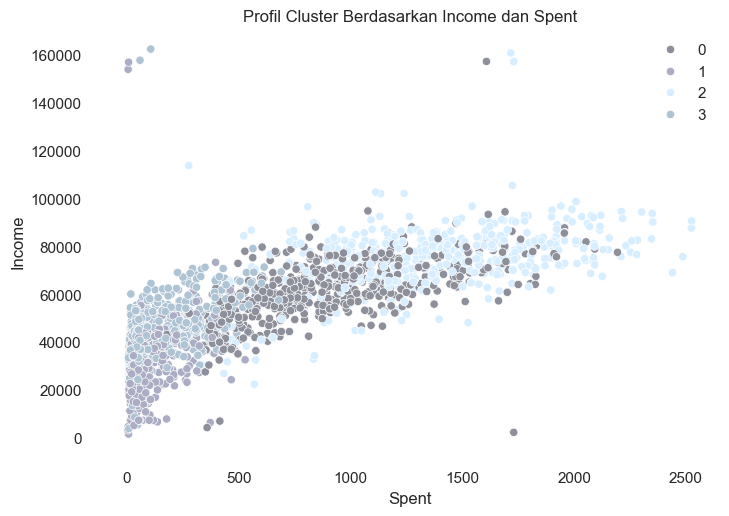

In [51]:
pl = sns.scatterplot(data= data,x= data["Spent"], y= data["Income"], hue= data["Clusters"], palette= pal)
pl.set_title("Profil Cluster Berdasarkan Income dan Spent")
plt.legend()
plt.show()

**Grafik Income vs Spent menunjukkan pola cluster**

* kelompok 0: Spent tinggi & Income rata-rata
* kelompok 1: Spent tinggi & Income tinggi
* kelompok 2: Spent rendah & Income rendah
* kelompok 3: Spent tinggi & Income rendah

Selanjutnya, mari lihat detail distribusi cluster berdasarkan berbagai produk dalam data. Yaitu: Wine, Buah, Daging, Ikan, Permen, dan Emas

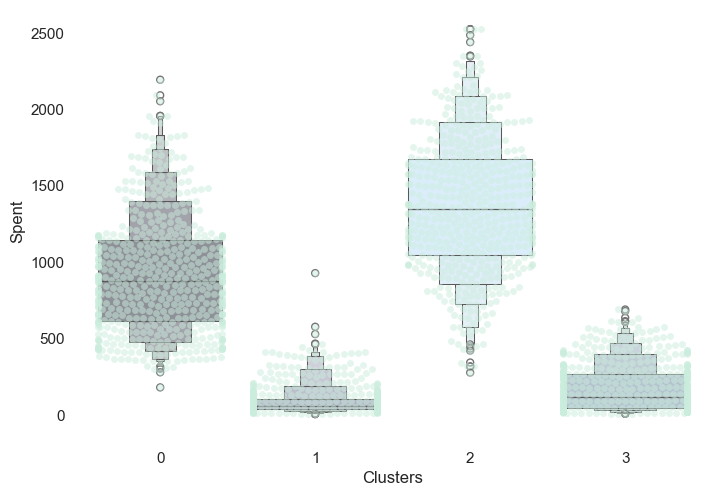

In [52]:
plt.figure()
pl = sns.swarmplot(x= data["Clusters"], y= data["Spent"], color= "#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x= data["Clusters"], y= data["Spent"], palette= pal)
plt.show()

Dari plot di atas, jelas terlihat bahwa cluster 1 adalah kumpulan pelanggan terbesar yang diikuti dengan erat oleh cluster 0.
Jelajahi apa yang setiap cluster belanjakan untuk strategi pemasaran yang ditargetkan.

Mari jelajahi bagaimana kinerja promosi di masa lalu.

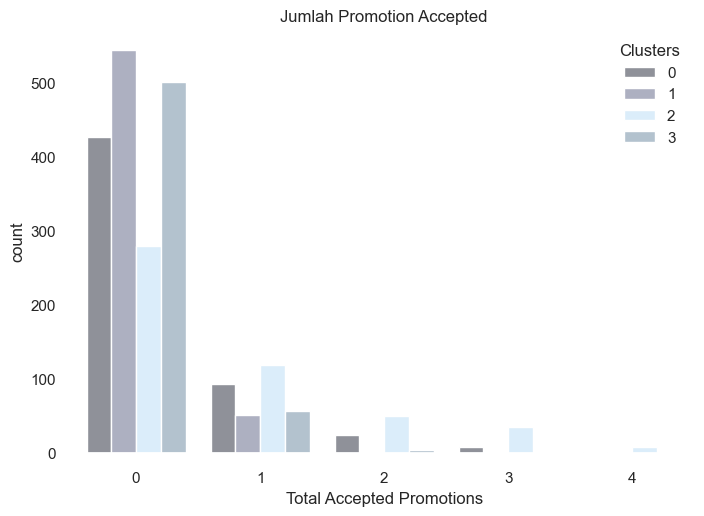

In [53]:
# buat fitur untuk menjumlahkan promosi yang diterima
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

# plot jumlah total promosi yang diterima
plt.figure()
pl = sns.countplot(x= data["Total_Promos"], hue= data["Clusters"], palette= pal)
pl.set_title("Jumlah Promotion Accepted")
pl.set_xlabel("Total Accepted Promotions")
plt.show()

Belum ada tanggapan yang luar biasa terhadap promosi yang dilakukan sejauh ini. Sangat sedikit partisipan secara keseluruhan. Selain itu, tidak ada yang mengikuti ke-5 promosi tersebut. Mungkin promosi yang ditargetkan dengan lebih baik dan direncanakan dengan baik diperlukan untuk meningkatkan penjualan.

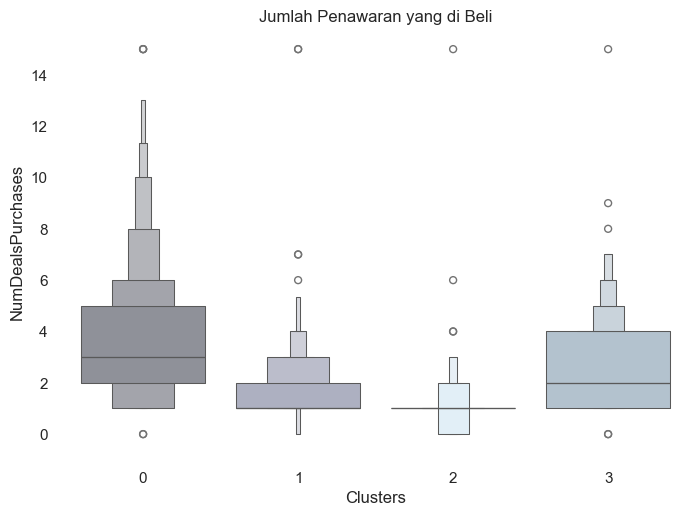

In [54]:
# plot jumlah penawaran yang dibeli
plt.figure()
pl = sns.boxenplot(y= data["NumDealsPurchases"], x= data["Clusters"], palette= pal)
pl.set_title("Jumlah Penawaran yang di Beli")
plt.show()

Berbeda dengan kampanye, penawaran yang ditawarkan berhasil. Ini memiliki hasil terbaik dengan cluster 0 dan cluster 3.
Namun, pelanggan di cluster 1 tidak begitu tertarik dengan penawaran tersebut.
Tidak ada yang tampaknya menarik cluster 2 secara besar-besaran.

<Figure size 800x550 with 0 Axes>

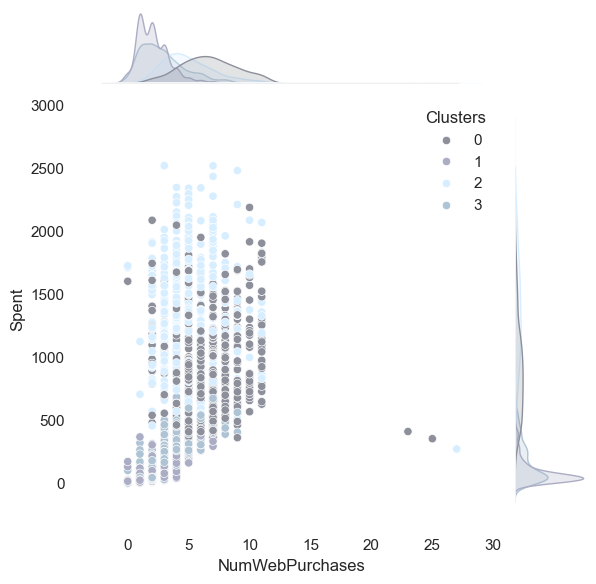

<Figure size 800x550 with 0 Axes>

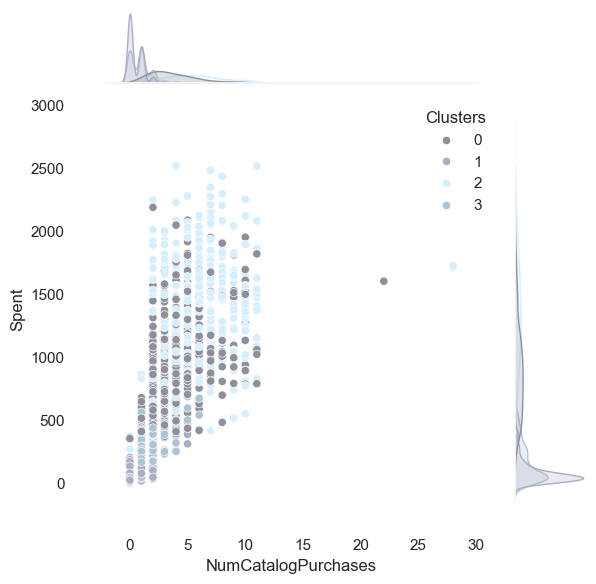

<Figure size 800x550 with 0 Axes>

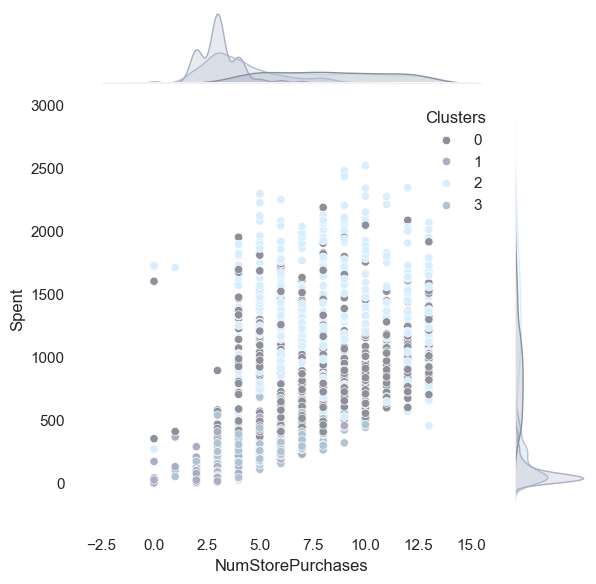

<Figure size 800x550 with 0 Axes>

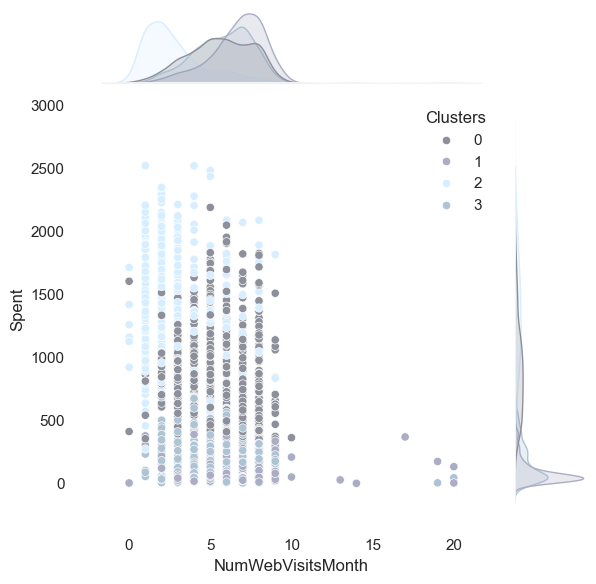

In [55]:
# untuk lebih detail dari gaya pembelian
Places = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x= data[i], y= data["Spent"], hue= data["Clusters"], palette= pal)
    plt.show()

<a id="8"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Profiling</p>

Sekarang setelah terbentuk cluster dan melihat kebiasaan pembelian mereka.
Mari lihat siapa saja yang berada dalam cluster-clusternya. Untuk itu, buat profil cluster yang terbentuk dan sampai pada kesimpulan tentang siapa pelanggan utama dan siapa yang membutuhkan lebih banyak perhatian dari tim pemasaran toko ritel.

Untuk menentukan hal itu, plot beberapa fitur yang menunjukkan ciri pribadi pelanggan dalam konteks cluster yang mereka tempati.
Berdasarkan hasilnya, kita akan sampai pada kesimpulan.

<Figure size 800x550 with 0 Axes>

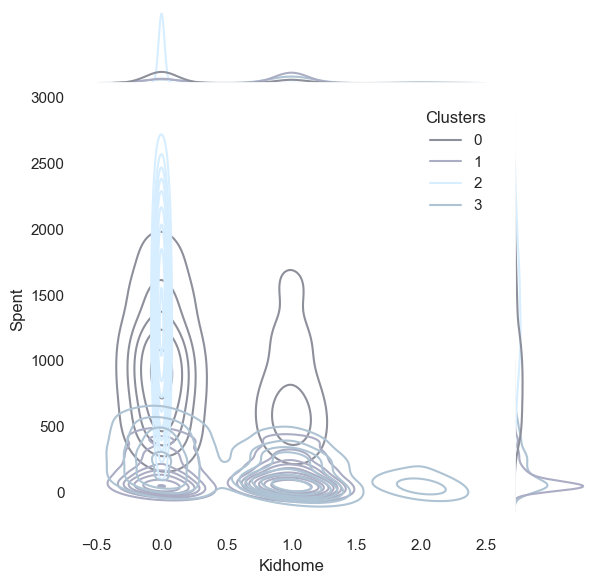

<Figure size 800x550 with 0 Axes>

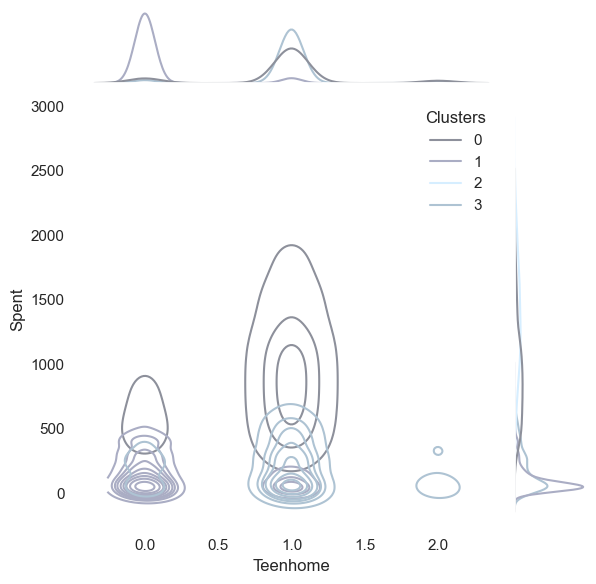

<Figure size 800x550 with 0 Axes>

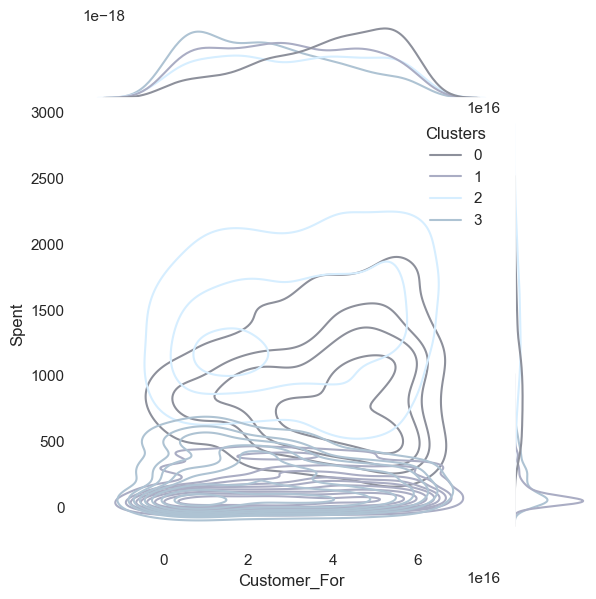

<Figure size 800x550 with 0 Axes>

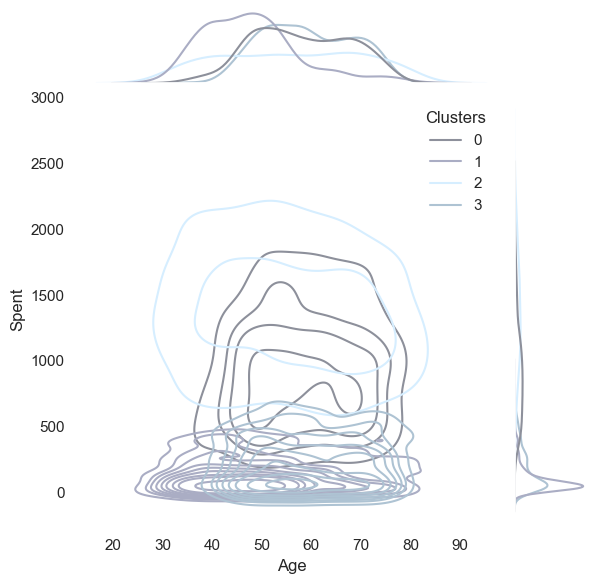

<Figure size 800x550 with 0 Axes>

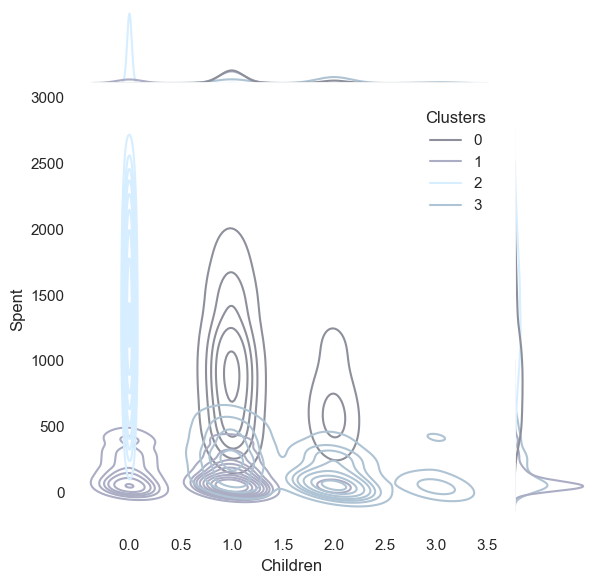

<Figure size 800x550 with 0 Axes>

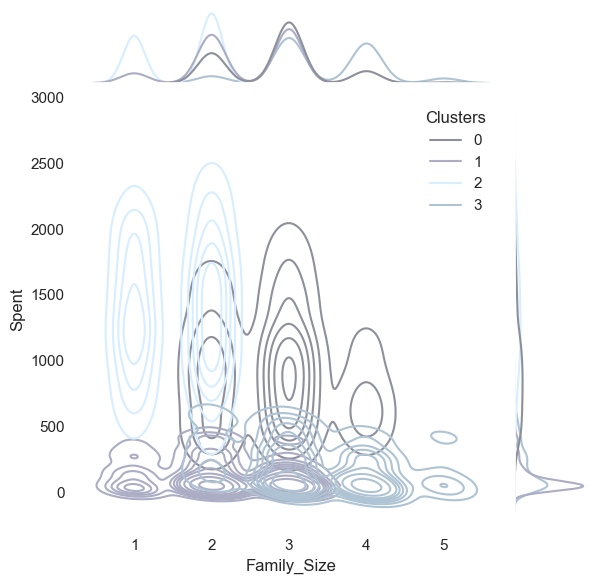

<Figure size 800x550 with 0 Axes>

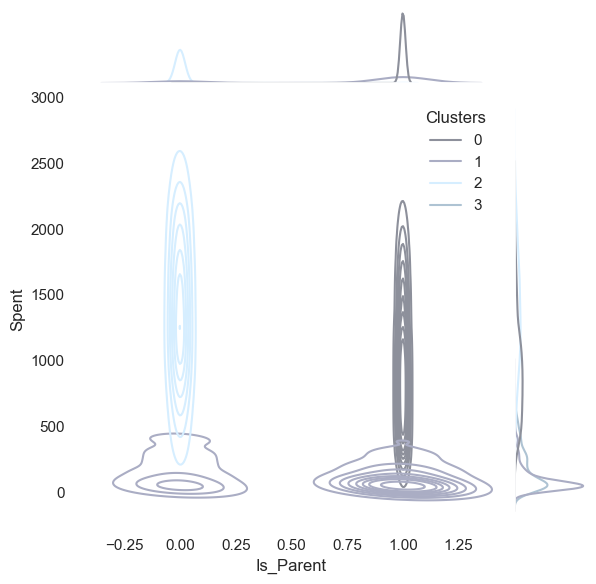

<Figure size 800x550 with 0 Axes>

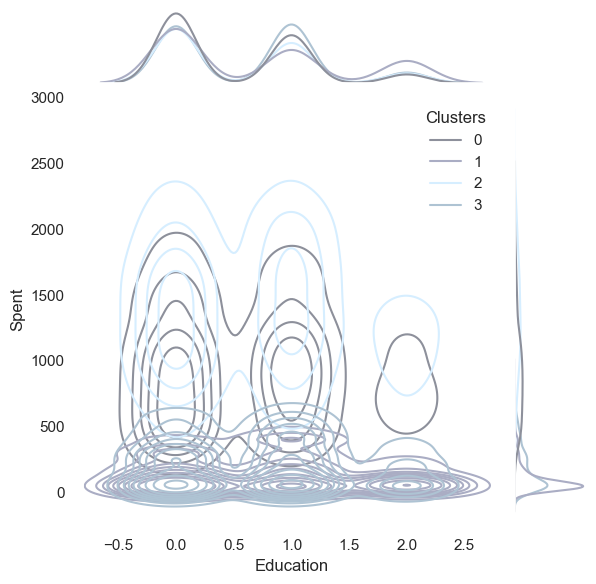

<Figure size 800x550 with 0 Axes>

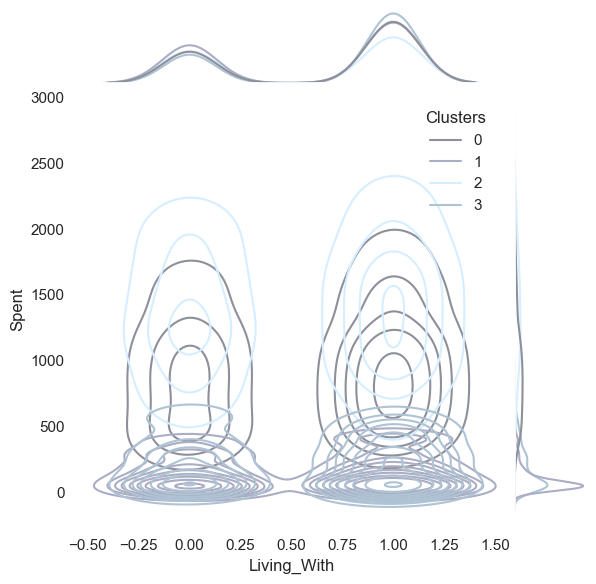

In [56]:
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x= data[i], y= data["Spent"], hue= data["Clusters"], kind= "kde", palette= pal)
    plt.show()

**Poin-poin yang perlu diperhatikan:**

Informasi berikut dapat disimpulkan tentang pelanggan di berbagai cluster.

**Cluster 0:**
* Mereka pastinya adalah seorang orang tua.
* Maksimal memiliki 4 anggota keluarga dan minimal 2.
* Single Parent merupakan subset dari kelompok ini.
* Kebanyakan memiliki anak remaja di rumah.
* Relatif lebih tua.

**Cluster 1:**

* Mereka pastinya bukan seorang orang tua.
* Maksimal hanya ada 2 anggota dalam keluarga.
* Sebagian besar adalah pasangan daripada individu yang single.
* Terdiri dari semua rentang usia.
* Kelompok dengan pendapatan tinggi.

**Cluster 2:**

* Sebagian besar dari mereka adalah seorang orang tua.
* Maksimal ada 3 anggota dalam keluarga.
* Sebagian besar memiliki satu anak (dan bukan remaja, biasanya).
* Relatif lebih muda.

**Cluster 3:**

* Mereka pasti merupakan orang tua.
* Maksimal ada 5 anggota dalam keluarga dan minimal 2.
* Sebagian besar dari mereka memiliki anak remaja di rumah.
* Relatif lebih tua.
* Dan kelompok dengan pendapatan lebih rendah.

<a id="9"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Conclusion</p>

Dalam proyek ini, dilakukan pembentukan unsupervised clustering. Menggunakan dimensionality reduction diikuti oleh agglomerative clustering. Didapatkan 4 cluster dan lebih lanjut menggunakan mereka dalam membuat profil pelanggan di cluster berdasarkan struktur keluarga dan pendapatan/pengeluaran mereka. Hal ini dapat digunakan dalam merencanakan strategi pemasaran yang lebih baik

<a id="10"></a>
### <p style="background-color:#153B50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">End</p>